# GFG Hackathon submission

first importing all libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

loading all files into dataframes

In [153]:
df_submission = pd.read_csv("submission_format.csv")
df_test_set_features = pd.read_csv("test_set_features.csv")

In [154]:
df_training_set_features = pd.read_csv("training_set_features.csv")
df_training_set_labels = pd.read_csv("training_set_labels.csv")

getting an idea of the dataframes

In [155]:
df_submission.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


In [156]:
df_training_set_features.shape

(26707, 36)

In [157]:
df_training_set_labels.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


concated the two dataframes of training features and labels

In [158]:
df_final = pd.concat([df_training_set_features,df_training_set_labels], axis = 1)

In [159]:
df_final.shape

(26707, 39)

I then identified all the entries which had more than 10 missing features and removed those entries

In [160]:
series1 =df_final.isnull().sum(axis = 1)
print(series1[series1 < 10].size, series1[series1 > 10].size)

25848 773


In [161]:
df_final[series1 <= 10].shape

(25934, 39)

just making sure that these two add up to the same total as the original number of rows

In [162]:
#plt.plot(series1, 'g--')
25934 + 773

26707

In [163]:
df_final = df_final[series1 <= 10]

In [164]:
df_final.shape

(25934, 39)

getting an idea of missing values

In [211]:
df_final.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

Since employment industry, employment occupation and health insurance have missing values for about half the values I decided to discard it

In [166]:
df_final.drop(columns = ['employment_industry', 'employment_occupation', 'health_insurance'], inplace = True)

Also, when using concat, the id column was also joined resulting in duplicate columns, So I removed it also

In [167]:
df_final = df_final.loc[:, ~df_final.columns.duplicated()].copy()

After the edits, the final size of the dataframe is

In [168]:
df_final.shape

(25934, 35)

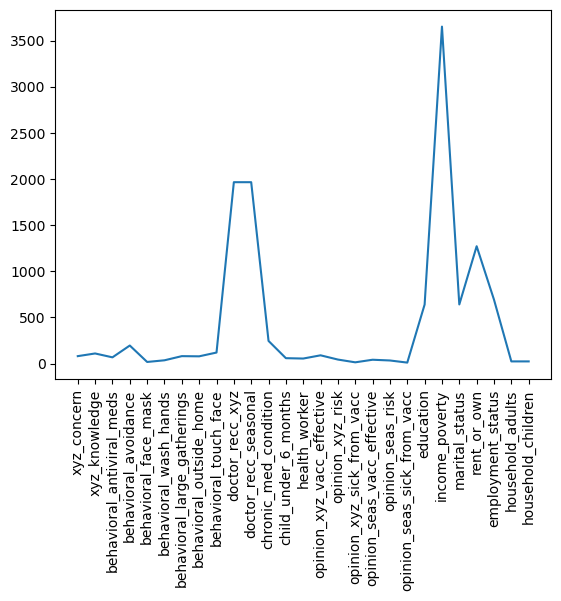

In [169]:
plt.xticks(rotation = 90)
plt.plot(df_final.isnull().sum()[df_final.isnull().sum() > 0])

In [170]:
df_final.income_poverty.unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [171]:
df_final.income_poverty.fillna('<= $75,000, Above Poverty', inplace = True)

In [172]:
df_final.doctor_recc_seasonal.fillna(0, inplace = True)

In [173]:
df_final.doctor_recc_xyz.describe()

count    23969.000000
mean         0.221161
std          0.415037
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: doctor_recc_xyz, dtype: float64

In [174]:
df_final.doctor_recc_xyz.fillna(0, inplace = True)

In [175]:
df_final.employment_status.unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

In [176]:
df_final.employment_status.fillna('Employed', inplace = True)

In [177]:
df_final.rent_or_own.describe()

count     24663
unique        2
top         Own
freq      18734
Name: rent_or_own, dtype: object

In [178]:
df_final.rent_or_own.fillna('Own', inplace = True)

In [179]:
df_final.marital_status.unique()

array(['Not Married', 'Married', nan], dtype=object)

In [180]:
df_final.marital_status.fillna('Married', inplace = True)

In [181]:
df_final.education.describe()

count                25295
unique                   4
top       College Graduate
freq                 10096
Name: education, dtype: object

In [182]:
df_final.education.fillna('College Graduate', inplace = True)

In [183]:
df_final.chronic_med_condition.unique()

array([ 0.,  1., nan])

In [184]:
df_final.chronic_med_condition.fillna(0, inplace = True)

In [185]:
df_final.behavioral_avoidance.describe()

count    25739.000000
mean         0.728156
std          0.444919
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: behavioral_avoidance, dtype: float64

In [186]:
df_final.behavioral_avoidance.fillna(1, inplace = True)

In [187]:
df_final.behavioral_touch_face.describe()

count    25815.000000
mean         0.678210
std          0.467172
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: behavioral_touch_face, dtype: float64

In [188]:
df_final.behavioral_touch_face.fillna(1, inplace = True)

In [189]:
df_final.xyz_knowledge.describe()

count    25825.000000
mean         1.272682
std          0.612302
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: xyz_knowledge, dtype: float64

In [190]:
df_final.xyz_knowledge.fillna(1, inplace = True)

In [191]:
df_final.opinion_xyz_vacc_effective.describe()

count    25845.000000
mean         3.856723
std          1.004333
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: opinion_xyz_vacc_effective, dtype: float64

In [192]:
df_final.opinion_xyz_vacc_effective.fillna(4, inplace = True)

In [193]:
df_final.xyz_concern.describe()

count    25854.000000
mean         1.618937
std          0.906271
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: xyz_concern, dtype: float64

In [194]:
df_final.xyz_concern.fillna(2, inplace = True)

In [195]:
df_final.behavioral_large_gatherings.describe()

count    25854.000000
mean         0.357701
std          0.479333
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: behavioral_large_gatherings, dtype: float64

In [196]:
df_final.behavioral_large_gatherings.fillna(0, inplace = True)

In [197]:
df_final.behavioral_outside_home.describe()

count    25856.000000
mean         0.335435
std          0.472151
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: behavioral_outside_home, dtype: float64

In [198]:
df_final.behavioral_outside_home.fillna(0, inplace = True)

In [199]:
df_final.behavioral_antiviral_meds.fillna(df_final.behavioral_antiviral_meds.median(), inplace = True)

In [200]:
df_final.child_under_6_months.fillna(df_final.child_under_6_months.median(), inplace = True)

In [201]:
df_final.health_worker.fillna(df_final.health_worker.median(), inplace = True)

In [202]:
df_final.opinion_xyz_risk.fillna(df_final.opinion_xyz_risk.median(), inplace = True)

In [203]:
df_final.opinion_seas_vacc_effective.fillna(df_final.opinion_seas_vacc_effective.median(), inplace = True)

In [204]:
df_final.behavioral_wash_hands.fillna(df_final.behavioral_wash_hands.median(), inplace = True)

In [205]:
df_final.opinion_seas_risk.fillna(df_final.opinion_seas_risk.median(), inplace = True)

In [206]:
df_final.household_adults.fillna(df_final.household_adults.median(), inplace = True)

In [207]:
df_final.household_children.fillna(df_final.household_children.median(), inplace = True)

In [208]:
df_final.behavioral_face_mask.fillna(df_final.behavioral_face_mask.median(), inplace = True)

In [209]:
df_final.opinion_xyz_sick_from_vacc.fillna(df_final.opinion_xyz_sick_from_vacc.median(), inplace = True)

In [210]:
df_final.opinion_seas_sick_from_vacc.fillna(df_final.opinion_seas_sick_from_vacc.median(), inplace = True)

# Encoding stuff

In [212]:
df_final.age_group

0        55 - 64 Years
1        35 - 44 Years
2        18 - 34 Years
3            65+ Years
4        45 - 54 Years
             ...      
26702        65+ Years
26703    18 - 34 Years
26704    55 - 64 Years
26705    18 - 34 Years
26706        65+ Years
Name: age_group, Length: 25934, dtype: object

In [213]:
le = LabelEncoder()
df_final['age_group'] = le.fit_transform(df_final['age_group'])

In [214]:
df_final.census_msa.unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [215]:
df_final['education'] = le.fit_transform(df_final['education'])
df_final['race'] = le.fit_transform(df_final['race'])
df_final['sex'] = le.fit_transform(df_final['sex'])
df_final['income_poverty'] = le.fit_transform(df_final['income_poverty'])
df_final['marital_status'] = le.fit_transform(df_final['marital_status'])

In [216]:
df_final['rent_or_own'] = le.fit_transform(df_final['rent_or_own'])
df_final['employment_status'] = le.fit_transform(df_final['employment_status'])
df_final['hhs_geo_region'] = le.fit_transform(df_final['hhs_geo_region'])
df_final['census_msa'] = le.fit_transform(df_final['census_msa'])


# Segregating into parameters and labels

In [244]:
X = df_final.iloc[:, 1:-2]
y_xyz = df_final.iloc[:, -2]
y_seasonal = df_final.iloc[:, -1]

# using random forest regressor


## first for classifying xyz

In [218]:
X_train_xyz, X_test_xyz, y_train_xyz, y_test_xyz = train_test_split(X, y_xyz, test_size = 0.30)

In [219]:
rf_classifier_xyz = RandomForestClassifier(n_estimators=100, random_state=42)

In [220]:
rf_classifier_xyz.fit(X_train_xyz, y_train_xyz)

RandomForestClassifier(random_state=42)

In [221]:
y_pred_xyz = rf_classifier_xyz.predict_proba(X_test_xyz)

In [222]:
y_pred_xyz = y_pred_xyz[:, 1]

In [223]:
roc_auc_xyz = roc_auc_score(y_test_xyz, y_pred_xyz)

In [224]:
roc_auc_xyz

0.8291194109791118

## For seasonal

In [225]:
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size = 0.30)

In [226]:
rf_classifier_seasonal = RandomForestClassifier(n_estimators=100, random_state=42)

In [227]:
rf_classifier_seasonal.fit(X_train_seasonal, y_train_seasonal)

RandomForestClassifier(random_state=42)

In [228]:
y_pred_seasonal = rf_classifier_seasonal.predict_proba(X_test_seasonal)

In [229]:
y_pred_seasonal = y_pred_seasonal[:, 1]

In [230]:
roc_auc_seasonal = roc_auc_score(y_test_seasonal, y_pred_seasonal)

In [231]:
roc_auc_seasonal

0.8458259380939793

The model exhibits an accuracy score of above 80 percentfor both of the labels, we now move forward with predicting the test values

## Finding probabilty for test dataset

In [232]:
df_test_set_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [233]:
df_test_set_features.drop(columns = ['employment_industry', 'employment_occupation', 'health_insurance'], inplace = True)

In [234]:
df_test_set_features.shape

(26708, 33)

In [235]:
df_test_set_features.isnull().sum()

respondent_id                     0
xyz_concern                      85
xyz_knowledge                   122
behavioral_antiviral_meds        79
behavioral_avoidance            213
behavioral_face_mask             19
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4497
marital_status                 1442
rent_or_own                 

In [236]:
df_test_set_features.xyz_concern.fillna(df_test_set_features.xyz_concern.median(), inplace = True)
df_test_set_features.xyz_knowledge.fillna(df_test_set_features.xyz_knowledge.median(), inplace = True)
df_test_set_features.behavioral_antiviral_meds.fillna(df_test_set_features.behavioral_antiviral_meds.median(), inplace = True)
df_test_set_features.behavioral_avoidance.fillna(df_test_set_features.behavioral_avoidance.median(), inplace = True)
df_test_set_features.behavioral_face_mask.fillna(df_test_set_features.behavioral_face_mask.median(), inplace = True)
df_test_set_features.behavioral_large_gatherings.fillna(df_test_set_features.behavioral_large_gatherings.median(), inplace = True)
df_test_set_features.behavioral_outside_home.fillna(df_test_set_features.behavioral_outside_home.median(), inplace = True)
df_test_set_features.behavioral_touch_face.fillna(df_test_set_features.behavioral_touch_face.median(), inplace = True)
df_test_set_features.behavioral_wash_hands.fillna(df_test_set_features.behavioral_wash_hands.median(), inplace = True)
df_test_set_features.doctor_recc_xyz.fillna(df_test_set_features.doctor_recc_xyz.median(), inplace = True)
df_test_set_features.doctor_recc_seasonal.fillna(df_test_set_features.doctor_recc_seasonal.median(), inplace = True)
df_test_set_features.chronic_med_condition.fillna(df_test_set_features.chronic_med_condition.median(), inplace = True)
df_test_set_features.child_under_6_months.fillna(df_test_set_features.child_under_6_months.median(), inplace = True)
df_test_set_features.health_worker.fillna(df_test_set_features.health_worker.median(), inplace = True)
df_test_set_features.opinion_seas_risk.fillna(df_test_set_features.opinion_seas_risk.median(), inplace = True)
df_test_set_features.opinion_seas_sick_from_vacc.fillna(df_test_set_features.opinion_seas_sick_from_vacc.median(), inplace = True)
df_test_set_features.opinion_seas_vacc_effective.fillna(df_test_set_features.opinion_seas_vacc_effective.median(), inplace = True)
df_test_set_features.opinion_xyz_risk.fillna(df_test_set_features.opinion_xyz_risk.median(), inplace = True)
df_test_set_features.opinion_xyz_sick_from_vacc.fillna(df_test_set_features.opinion_xyz_sick_from_vacc.median(), inplace = True)
df_test_set_features.opinion_xyz_vacc_effective.fillna(df_test_set_features.opinion_xyz_vacc_effective.median(), inplace = True)
df_test_set_features.household_adults.fillna(df_test_set_features.household_adults.median(), inplace = True)
df_test_set_features.household_children.fillna(df_test_set_features.household_children.median(), inplace = True)

In [237]:
df_test_set_features.education.fillna('College Graduate', inplace = True)
df_test_set_features.income_poverty.fillna('<= $75,000, Above Poverty', inplace = True)
df_test_set_features.marital_status.fillna('Married', inplace = True)
df_test_set_features.rent_or_own.fillna('Own', inplace = True)
df_test_set_features.employment_status.fillna('Employed', inplace = True)


In [238]:
df_test_set_features['employment_status'].describe()

count        26708
unique           3
top       Employed
freq         15103
Name: employment_status, dtype: object

In [239]:
df_test_set_features['age_group'] = le.fit_transform(df_test_set_features['age_group'])
df_test_set_features['education'] = le.fit_transform(df_test_set_features['education'])
df_test_set_features['race'] = le.fit_transform(df_test_set_features['race'])
df_test_set_features['sex'] = le.fit_transform(df_test_set_features['sex'])
df_test_set_features['income_poverty'] = le.fit_transform(df_test_set_features['income_poverty'])
df_test_set_features['marital_status'] = le.fit_transform(df_test_set_features['marital_status'])
df_test_set_features['rent_or_own'] = le.fit_transform(df_test_set_features['rent_or_own'])
df_test_set_features['employment_status'] = le.fit_transform(df_test_set_features['employment_status'])
df_test_set_features['hhs_geo_region'] = le.fit_transform(df_test_set_features['hhs_geo_region'])
df_test_set_features['census_msa'] = le.fit_transform(df_test_set_features['census_msa'])

In [241]:
df_submission.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [246]:
X_final = df_test_set_features.iloc[:, 1:]

Finally calculating the probabilities using the model

In [247]:
h1n1_vaccine = rf_classifier_xyz.predict_proba(X_final)
seasonal_vaccine = rf_classifier_seasonal.predict_proba(X_final)

In [248]:
df_submission['h1n1_vaccine'] = h1n1_vaccine[:, 1]
df_submission['seasonal_vaccine'] = seasonal_vaccine[:, 1]

In [253]:
df_submission.set_index("respondent_id", inplace = True)

In [254]:
df_submission.to_csv('submission_format.csv')